In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* clothes_dataset.zip 압축해제

In [2]:
!pwd

/content


In [3]:
!mkdir clothes_dataset

mkdir: cannot create directory ‘clothes_dataset’: File exists


In [4]:
!unzip '/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/clothes_dataset.zip' -d ./clothes_dataset/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./clothes_dataset/brown_shoes/29c9bf50db194174be8c8dafa3373f3eb337bb2d.jpg  
  inflating: ./clothes_dataset/brown_shoes/2b5552c967c7f406b1b780e9188cdbadcf4be6d1.jpg  
  inflating: ./clothes_dataset/brown_shoes/2b802f7d6e2b73ed86924aa7a8a8c65e0b9661ca.jpg  
  inflating: ./clothes_dataset/brown_shoes/2d202ed49ac15aeff75681b0d78c322c68852785.jpg  
  inflating: ./clothes_dataset/brown_shoes/2df99267923b05486744f5fe59ffb9dbf0dce133.jpg  
  inflating: ./clothes_dataset/brown_shoes/2e94cdf3e3020cad6ad91f01cf75264a270908c6.jpg  
  inflating: ./clothes_dataset/brown_shoes/2e9ec5a783dd8eb88af84a2fa01dd44ec0837e19.jpg  
  inflating: ./clothes_dataset/brown_shoes/2ee1746aacd7d31ab3a941934a11b9b34ae884bc.jpg  
  inflating: ./clothes_dataset/brown_shoes/2f098f41527b7ef3404c1df984f775d21b10df15.jpg  
  inflating: ./clothes_dataset/brown_shoes/2fbff880bb5d7c001b8993372107a9d06ac44a7f.jpg  
  inflating: ./clothes_dataset/brown_shoes/3034f61d1f09748763c3e

* 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob as glob
import cv2

all_data = np.array(glob.glob('/content/clothes_dataset/*/*.jpg', recursive=True))

# 색과 옷의 종류를 구별하기 위해 해당되는 label에 1을 삽입합니다.
def check_cc(color, clothes):
    labels = np.zeros(11,)
    
    # color check
    if(color == 'black'):
        labels[0] = 1
        color_index = 0
    elif(color == 'blue'):
        labels[1] = 1
        color_index = 1
    elif(color == 'brown'):
        labels[2] = 1
        color_index = 2
    elif(color == 'green'):
        labels[3] = 1
        color_index = 3
    elif(color == 'red'):
        labels[4] = 1
        color_index = 4
    elif(color == 'white'):
        labels[5] = 1
        color_index = 5
        
    # clothes check
    if(clothes == 'dress'):
        labels[6] = 1
    elif(clothes == 'shirt'):
        labels[7] = 1
    elif(clothes == 'pants'):
        labels[8] = 1
    elif(clothes == 'shorts'):
        labels[9] = 1
    elif(clothes == 'shoes'):
        labels[10] = 1
        
    return labels, color_index

# label과 color_label을 담을 배열을 선언합니다.
all_labels = np.empty((all_data.shape[0], 11))
all_color_labels = np.empty((all_data.shape[0], 1))
# print(all_data[0])
for i, data in enumerate(all_data):
    color_and_clothes = all_data[i].split('/')[-2].split('_')

    color = color_and_clothes[0]
    clothes = color_and_clothes[1]
    # print(color,clothes)
    
    labels, color_index = check_cc(color, clothes)
    all_labels[i] = labels
    all_color_labels[i] = color_index
    
all_labels = np.concatenate((all_labels, all_color_labels), axis = -1)

In [6]:
all_data

array(['/content/clothes_dataset/red_shoes/57007b1e36f9b86f2832005bf20de8d3fe12b518.jpg',
       '/content/clothes_dataset/red_shoes/5e006b1eab73efeaa91fb76aa7c2d6e24706e60f.jpg',
       '/content/clothes_dataset/red_shoes/c23f9fcb3caebad169fd4b671cf71fd196fed7e3.jpg',
       ...,
       '/content/clothes_dataset/blue_shirt/83c86d0baf7782dc40aced68d451ad835bce930c.jpg',
       '/content/clothes_dataset/blue_shirt/7b0dae0a9bd09af24390c50089e14ed5874c060c.jpg',
       '/content/clothes_dataset/blue_shirt/c93ff1693d6d827ff4262c7bcf24c0d44ce397be.jpg'],
      dtype='<U82')

In [7]:
all_labels.shape

(11385, 12)

In [8]:
from sklearn.model_selection import train_test_split

# 훈련, 검증, 테스트 데이터셋으로 나눕니다.
train_x, test_x, train_y, test_y = train_test_split(all_data, all_labels, shuffle = True, test_size = 0.3,
                                                   random_state = 99)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, shuffle = True, test_size = 0.3,
                                                 random_state = 99)

In [9]:
train_df = pd.DataFrame({'image':train_x, 'black':train_y[:, 0], 'blue':train_y[:, 1],
                        'brown':train_y[:, 2], 'green':train_y[:, 3], 'red':train_y[:, 4],
                        'white':train_y[:, 5], 'dress':train_y[:, 6], 'shirt':train_y[:, 7],
                        'pants':train_y[:, 8], 'shorts':train_y[:, 9], 'shoes':train_y[:, 10],
                        'color':train_y[:, 11]})

val_df = pd.DataFrame({'image':val_x, 'black':val_y[:, 0], 'blue':val_y[:, 1],
                        'brown':val_y[:, 2], 'green':val_y[:, 3], 'red':val_y[:, 4],
                        'white':val_y[:, 5], 'dress':val_y[:, 6], 'shirt':val_y[:, 7],
                        'pants':val_y[:, 8], 'shorts':val_y[:, 9], 'shoes':val_y[:, 10],
                        'color':val_y[:, 11]})

test_df = pd.DataFrame({'image':test_x, 'black':test_y[:, 0], 'blue':test_y[:, 1],
                        'brown':test_y[:, 2], 'green':test_y[:, 3], 'red':test_y[:, 4],
                        'white':test_y[:, 5], 'dress':test_y[:, 6], 'shirt':test_y[:, 7],
                        'pants':test_y[:, 8], 'shorts':test_y[:, 9], 'shoes':test_y[:, 10],
                        'color':test_y[:, 11]})

In [10]:
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes,color
0,/content/clothes_dataset/green_shorts/e74d11d3...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
1,/content/clothes_dataset/black_dress/f1be32393...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,/content/clothes_dataset/black_shoes/04f78f68a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,/content/clothes_dataset/brown_pants/0671d132b...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,/content/clothes_dataset/white_shoes/59803fb01...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


In [11]:
# 저장할 경로
!mkdir csv_data

mkdir: cannot create directory ‘csv_data’: File exists


In [12]:
# 저장
train_df.to_csv('/content/csv_data/train.csv', index=False)
val_df.to_csv('/content/csv_data/val.csv', index=False)
test_df.to_csv('/content/csv_data/test.csv', index=False)

In [21]:
# 이미지 제너레이터 정의하기
from keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

def get_steps(num_sampels,batch_size):
  if (num_sampels % batch_size) > 0 :
    return (num_sampels // batch_size) + 1
  else:
     return (num_sampels // batch_size)

In [23]:
# 모델 만들기
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [24]:
model = Sequential()
model.add(Flatten(input_shape=(112,112,3))) # RGB값으로 색 지정
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(11,activation='sigmoid')) # 11개의 출력을 가지는 신경망
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 37632)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4817024   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 11)                715       
                                                                 
Total params: 4,825,995
Trainable params: 4,825,995
Non-trainable params: 0
_________________________________________________________________


In [26]:
train_df.columns

Index(['image', 'black', 'blue', 'brown', 'green', 'red', 'white', 'dress',
       'shirt', 'pants', 'shorts', 'shoes', 'color'],
      dtype='object')

In [27]:
# 데이터 제너레이터 정의하기
batch_size = 32
class_col =['black', 'blue', 'brown', 'green', 'red', 'white', 'dress','shirt', 'pants', 'shorts', 'shoes']

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='image',
                                                    y_col=class_col,
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    class_mode='raw',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=42)
val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                    x_col='image',
                                                    y_col=class_col,
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    class_mode='raw',
                                                    batch_size=batch_size,
                                                    shuffle=True
                                                 )

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [28]:
model.fit(train_generator,
          steps_per_epoch=get_steps(len(train_df),batch_size), 
          validation_data=val_generator,
          validation_steps=get_steps(len(val_df),batch_size),
          epochs = 10)

Epoch 1/10
175/175 [==============================] - 28s 157ms/step - loss: 0.5666 - binary_accuracy: 0.8415 - val_loss: 0.2993 - val_binary_accuracy: 0.8875
Epoch 2/10
175/175 [==============================] - 29s 165ms/step - loss: 0.3014 - binary_accuracy: 0.8808 - val_loss: 0.3139 - val_binary_accuracy: 0.8778
Epoch 3/10
175/175 [==============================] - 27s 154ms/step - loss: 0.2451 - binary_accuracy: 0.9035 - val_loss: 0.2435 - val_binary_accuracy: 0.9037
Epoch 4/10
175/175 [==============================] - 34s 192ms/step - loss: 0.2215 - binary_accuracy: 0.9130 - val_loss: 0.2104 - val_binary_accuracy: 0.9182
Epoch 5/10
175/175 [==============================] - 32s 180ms/step - loss: 0.2134 - binary_accuracy: 0.9158 - val_loss: 0.2368 - val_binary_accuracy: 0.9118
Epoch 6/10
175/175 [==============================] - 30s 169ms/step - loss: 0.1952 - binary_accuracy: 0.9232 - val_loss: 0.2123 - val_binary_accuracy: 0.9210
Epoch 7/10
175/175 [==========================

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                    x_col='image',
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    class_mode=None,
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                  )
preds = model.predict(test_generator,steps=get_steps(len(test_df),batch_size),verbose=1)

Found 3416 validated image filenames.
107/107 [==============================] - 12s 109ms/step


In [31]:
np.round(preds[0],2)

array([0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.02, 0.  ],
      dtype=float32)

In [32]:
import matplotlib.pyplot as plt

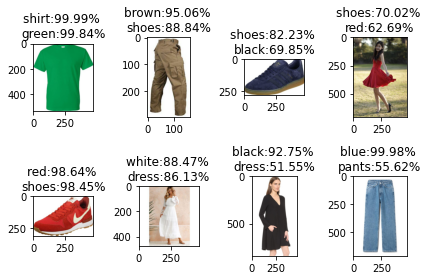

In [38]:
# 테스트 데이터 예측하기
do_preds = preds[:8]
for i ,pred in enumerate(do_preds):
  plt.subplot(2,4,i+1)
  prob = zip(class_col,list(pred))
  # print(list(prob))
  prob = sorted(list(prob),key=lambda x:x[1],reverse=True)
  # print(prob)
  image = cv2.imread(test_df['image'][i])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f'{prob[0][0]}:{round(prob[0][1]*100,2)}% \n{prob[1][0]}:{round(prob[1][1]*100,2)}%')
plt.tight_layout()
plt.show()

In [39]:
data_datagen = ImageDataGenerator(rescale=1./255)

data_generator = data_datagen.flow_from_directory(
                                                    directory='/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/06_clothes_img',
                                                    target_size=(112,112),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                  )
result = model.predict(data_generator,steps=get_steps(2,batch_size),verbose=1)

Found 4 images belonging to 1 classes.
1/1 [==============================] - 0s 89ms/step


In [40]:
result

array([[1.52786851e-01, 6.52106421e-04, 9.56296504e-01, 1.85247824e-01,
        8.73344397e-05, 2.28309003e-03, 1.27795630e-03, 1.63213081e-05,
        4.72517684e-03, 2.22380459e-03, 9.80769515e-01],
       [4.02874887e-01, 1.39958924e-04, 2.90269911e-01, 2.09356956e-02,
        4.10276145e-04, 2.19159517e-02, 5.00542298e-03, 1.35187315e-06,
        1.68185332e-03, 1.23237018e-02, 9.77578521e-01],
       [1.79782207e-03, 4.62408469e-04, 4.34684247e-01, 6.77505648e-03,
        7.25663122e-05, 6.68699384e-01, 1.03075884e-01, 1.37986478e-06,
        2.92289741e-02, 2.66093817e-02, 7.58549571e-01],
       [9.93593596e-03, 6.96583709e-04, 1.71822265e-01, 2.91292294e-04,
        1.42630748e-03, 3.08194607e-01, 6.62644506e-02, 4.05802979e-07,
        1.50276301e-02, 2.48940680e-02, 6.62990630e-01]], dtype=float32)

In [41]:
np.round(result,2)

array([[0.15, 0.  , 0.96, 0.19, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98],
       [0.4 , 0.  , 0.29, 0.02, 0.  , 0.02, 0.01, 0.  , 0.  , 0.01, 0.98],
       [0.  , 0.  , 0.43, 0.01, 0.  , 0.67, 0.1 , 0.  , 0.03, 0.03, 0.76],
       [0.01, 0.  , 0.17, 0.  , 0.  , 0.31, 0.07, 0.  , 0.02, 0.02, 0.66]],
      dtype=float32)

In [42]:
for i, pred in enumerate(result):
  prob = zip(class_col,list(pred))
  prob = sorted(list(prob),key=lambda x:x[1],reverse=True)
  print((f'{prob[0][0]}:{round(prob[0][1]*100,2)}% \n{prob[1][0]}:{round(prob[1][1]*100,2)}%'))

shoes:98.08% 
brown:95.63%
shoes:97.76% 
black:40.29%
shoes:75.85% 
white:66.87%
shoes:66.3% 
white:30.82%
